In [1]:
import tensorflow as tf 
import numpy as np 
from tensorflow import keras 
import os 
import math 
import random 
import pickle 
import glob
import matplotlib.pyplot as plt 
from collections import deque 
from tensorflow.keras import layers
import time 
import scipy.io as sio

from vehicle_model_ECMS_2 import Environment 
from cell_model import CellModel 
from driver_MDP import Driver_MDP 

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
driving_cycle_path = '../../OC_SIM_DB/OC_SIM_DB_Cycles/Highway/01_FTP72_fuds.mat'
# driving_cycle = sio.loadmat(driving_cycle_path)
# driving_cycle = driving_cycle["sch_cycle"][:, 1]
battery_path = "../../OC_SIM_DB/OC_SIM_DB_Bat/OC_SIM_DB_Bat_nimh_6_240_panasonic_MY01_Prius.mat"
motor_path = "../../OC_SIM_DB/OC_SIM_DB_Mot/OC_SIM_DB_Mot_pm_95_145_X2.mat"
cell_model = CellModel()

# env = Environment(cell_model, driving_cycle_path, battery_path, motor_path, -10)
# history = env.PMP_calculation()

In [3]:
histories = {}

EF = -30
lr = 4 
threshold = 0.01 

env = Environment(cell_model, driving_cycle_path, battery_path, motor_path)
while True: 
    print(EF)
    history = env.PMP_calculation(EF) 
#     print(history)
    SOC_final = history["SOC_traj"][-1]
    fuel_consumption = np.sum(history["fc_traj"])
    print("Equivalent factor: {:.2f}, Final SOC: {:.4f}, fuel_consumption: {:.4f}".
          format(EF, SOC_final, fuel_consumption))
    
    histories[EF] = history

    if abs(SOC_final - 0.6) < threshold: 
        break
        
    EF += lr * (SOC_final - 0.6)

-30
SOC is too low..
Equivalent factor: -30.00, Final SOC: 0.0047, fuel_consumption: 0.0111
-32.38109254841542
SOC is too low..
Equivalent factor: -32.38, Final SOC: 0.0047, fuel_consumption: 0.0111
-34.762185096830834
SOC is too low..
Equivalent factor: -34.76, Final SOC: 0.0047, fuel_consumption: 0.0111
-37.14327764524625
SOC is too low..
Equivalent factor: -37.14, Final SOC: 0.0047, fuel_consumption: 0.0111
-39.52437019366167
SOC is too low..
Equivalent factor: -39.52, Final SOC: 0.0047, fuel_consumption: 0.0111
-41.905462742077084
SOC is too low..
Equivalent factor: -41.91, Final SOC: 0.0041, fuel_consumption: 0.1761
-44.28914199573932
SOC is too low..
Equivalent factor: -44.29, Final SOC: 0.0042, fuel_consumption: 0.3411
-46.672302538259565
SOC is too low..
Equivalent factor: -46.67, Final SOC: 0.0050, fuel_consumption: 0.7265
-49.05244745082453
SOC is too low..
Equivalent factor: -49.05, Final SOC: 0.0046, fuel_consumption: 1.6072
-51.43388097704107
SOC is too low..
Equivalent fa

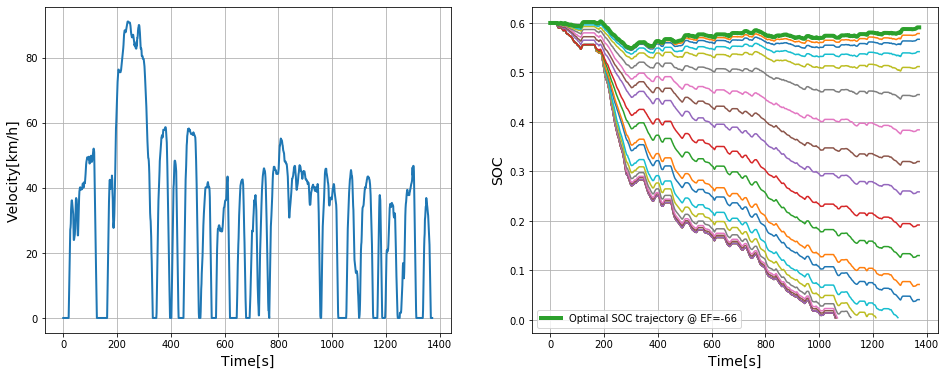

In [4]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(env.v_veh * 3.6, linewidth=2)
plt.xlabel("Time[s]", fontsize=14)
plt.ylabel("Velocity[km/h]", fontsize=14)
plt.grid() 

plt.subplot(1, 2, 2)
for eq, history in histories.items(): 
    if eq == EF: 
        plt.plot(history["SOC_traj"], label="Optimal SOC trajectory @ EF=-66", linewidth=4)
    else: 
        plt.plot(history["SOC_traj"])

plt.legend()
plt.grid() 
plt.xlabel("Time[s]", fontsize=14)
plt.ylabel("SOC", fontsize=14)

plt.savefig("Shooting method.png")

In [34]:
driving_cycle_paths = glob.glob("../data/driving_cycles/city/*.mat")
driving_cycle_path = driving_cycle_paths[10]

env = Environment(cell_model, driving_cycle_path, battery_path, motor_path)

In [35]:
history = env.PMP_calculation(EF) 

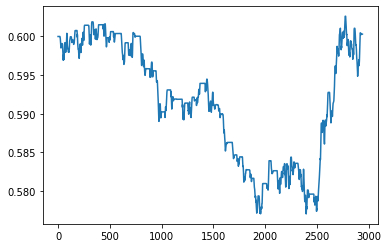

In [36]:
plt.plot(history["SOC_traj"])